**Importing all the required libraries**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [80]:
data = pd.read_csv("spam.csv",encoding='latin-1')

DATA CLEANING  AND PREPROCESSING

In [81]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [83]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [84]:
data.duplicated().sum()

403

In [85]:
data = data.drop_duplicates(keep = 'first')

In [86]:
data.duplicated().sum()

0

In [87]:
data = data.reset_index(drop = True)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5165,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5166,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5167,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [88]:
data.shape

(5169, 5)

In [89]:
#Droping unwanted columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

#Naming the columns
data = data.rename(columns = {'v1':'label','v2':'message'})

EDA ON DATASET AFTER DATA CLEANING

In [90]:
print(f"Email Not Spam : {round(data['label'].value_counts()[0] / len(data) * 100, 2)} %")
print(f"Spam Email : {round(data['message'].value_counts()[1] / len(data) * 100 , 2)} %")


Email Not Spam : 87.37 %
Spam Email : 0.02 %


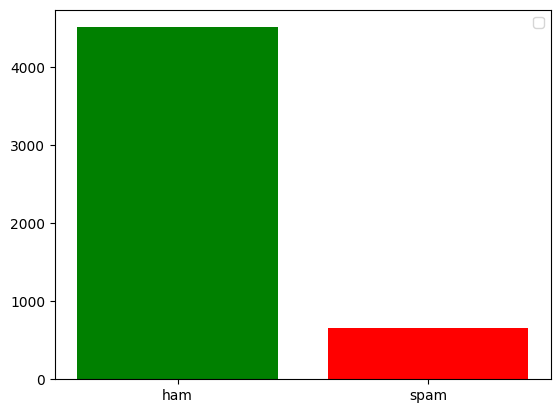

In [92]:
counts = data['label'].value_counts()
colors = ['green','red']
plt.bar(['ham', 'spam'], counts.values, color = colors)
plt.legend();

TOKENIZTION ON THE DATASET WITH

* STEMMING
* BAG OF WORDS
* LEMMATIZATION



In [94]:
# Initialize stemmer
stemmer = PorterStemmer()

# Preprocess text data
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    tokens = cleaned_text.split()
    # Remove stopwords and apply stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in set(stopwords.words('english'))]
    # Join the stemmed tokens back into a string
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

# Assuming 'data' is your DataFrame
data['processed_text'] = data['message'].apply(preprocess_text)
data


,label,message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...
5165,ham,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5166,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5167,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [95]:
bag_of_words = CountVectorizer(max_features=5000)
X = bag_of_words.fit_transform(bow).toarray()
X = pd.DataFrame(X)

In [99]:
y = pd.get_dummies(data['label'])
y = y.iloc[:,1].values


In [102]:
labels=data.iloc[:,[0]]['label']
labels

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5164    spam
5165     ham
5166     ham
5167     ham
5168     ham
Name: label, Length: 5169, dtype: object

In [103]:
le=LabelEncoder()
labels=le.fit_transform(labels)
labels

array([0, 0, 1, ..., 0, 0, 0])

In [104]:
len(set(stopwords.words('english')))

179

In [105]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
lemma=WordNetLemmatizer()

In [106]:
sent=data.iloc[:,[1]]['message']
sent

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5164    This is the 2nd time we have tried 2 contact u...
5165                Will Ì_ b going to esplanade fr home?
5166    Pity, * was in mood for that. So...any other s...
5167    The guy did some bitching but I acted like i'd...
5168                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [107]:
sentences=[]
for sen in sent:
  senti=re.sub('[^A-Za-z]',' ',sen)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  sentences.append(senti)

sentences

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

**TF**-**IDF** **Vectorization**

In [108]:

tfidf=TfidfVectorizer(max_features=5000)
features=tfidf.fit_transform(sentences)
features=features.toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
feature_names = tfidf.get_feature_names_out()
print(len(feature_names))


5000


In [110]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aathi', ..., 'zoe', 'zogtorius', 'zoom'],
      dtype=object)

In [115]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

cv = CountVectorizer


# Initialize the TF-IDF vectorizer
tf = TfidfVectorizer(max_features = 3000)

# Fit and transform the text column
X = tf.fit_transform(data['message']).toarray()
X.shape

(5169, 3000)

In [118]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the labels
data['target'] = encoder.fit_transform(data['label'])

In [119]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

**Building the NAIVE BAYES Model for SMS Spam detection**

In [120]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8965183752417795
[[809  87]
 [ 20 118]]
Precision Score 0.5756097560975609


In [121]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")


Accuracy Score: 0.9738878143133463
[[896   0]
 [ 27 111]]
Precision Score 1.0


In [122]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9845261121856866
[[893   3]
 [ 13 125]]
Precision Score 0.9765625


**Multiple Model for predicting the Accuracy on SMS Spam detection**

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = []
models.append(('Logistic Regression', LogisticRegression()) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier())))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive bayes', MultinomialNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))


models

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Naive bayes', MultinomialNB()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('Support Vector Machine', SVC())]

In [124]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})


df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,97.49,100.00,81.16,89.60
1,Naive bayes,97.39,100.00,80.43,89.16
2,KNeighborsClassifier,90.72,100.00,30.43,46.67
3,Support Vector Machine,97.97,99.16,85.51,91.83
4,Logistic Regression,96.42,99.03,73.91,84.65
5,Decision Tree Classifier,95.45,84.21,81.16,82.66


In [125]:
df = df.sort_values(by = 'F1 Score', ascending = False).reset_index(drop = True)
df


,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,97.97,99.16,85.51,91.83
1,Random Forest Classifier,97.49,100.00,81.16,89.60
2,Naive bayes,97.39,100.00,80.43,89.16
3,Logistic Regression,96.42,99.03,73.91,84.65
4,Decision Tree Classifier,95.45,84.21,81.16,82.66
5,KNeighborsClassifier,90.72,100.00,30.43,46.67


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


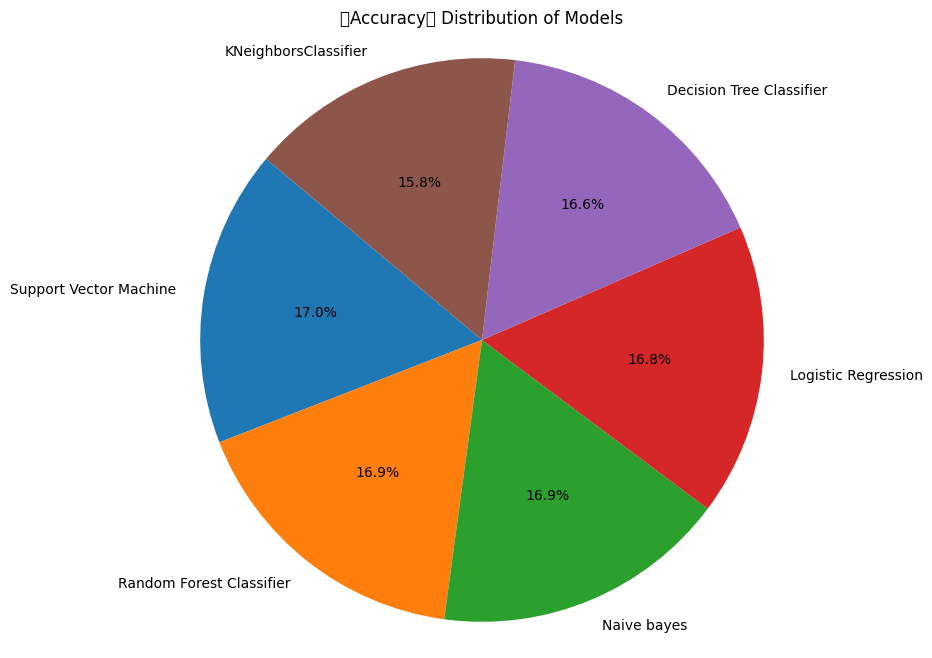

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(df['Accuracy'], labels=df['Model'], autopct='%1.1f%%', startangle=140)

# Add title
plt.title('	Accuracy	 Distribution of Models')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


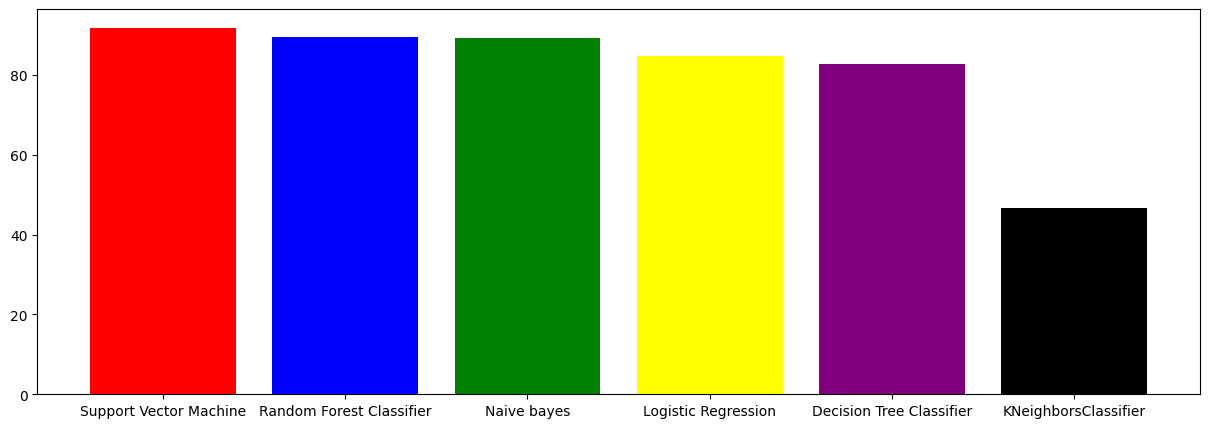

In [135]:
plt.figure(figsize = (15,5))
colors = ['red','blue','green','yellow','purple','black']
plt.bar(df['Model'],df['F1 Score'], color= colors);

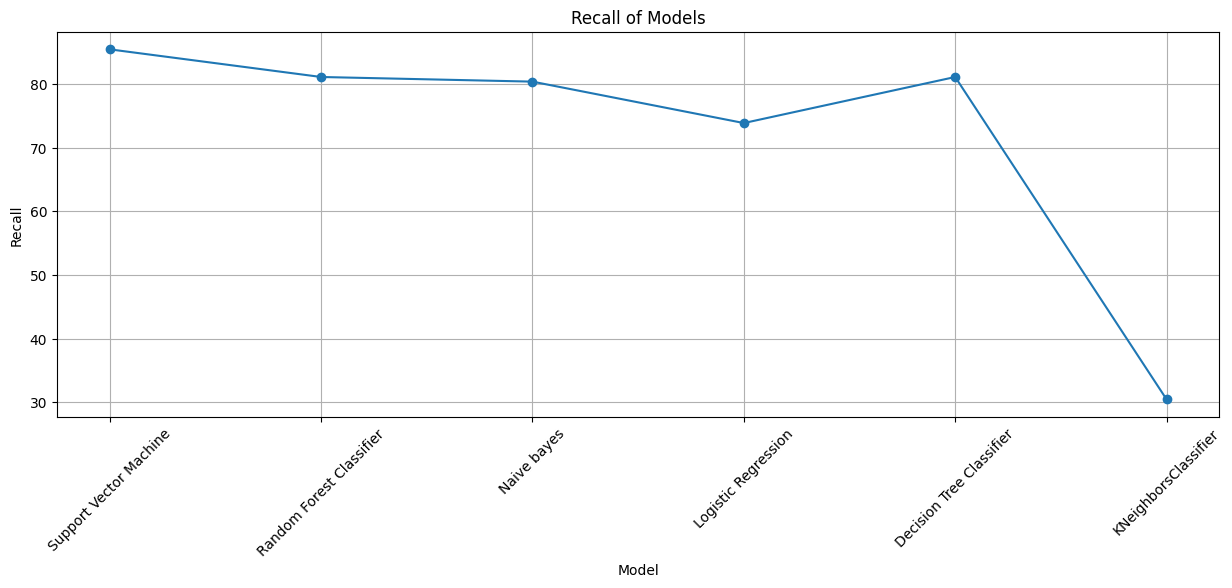

In [143]:

plt.figure(figsize=(15, 5))
plt.plot(df['Model'], df['Recall'], marker='o')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



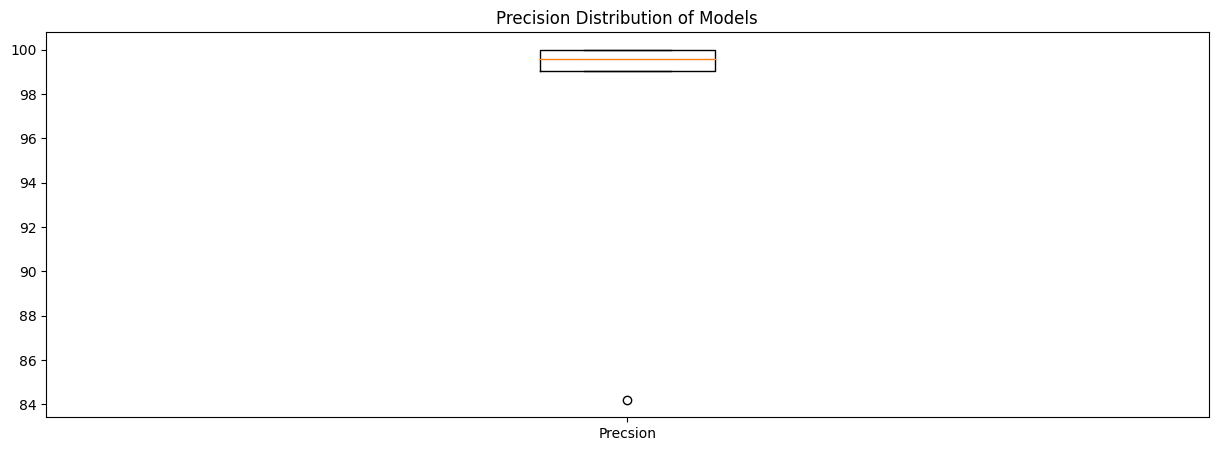

In [136]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['Precision'])
plt.xticks(ticks=[1], labels=['Precsion'])
plt.title('Precision Distribution of Models')
plt.show()
